# Rotacionando e Transladando

Você aprendeu (ou deveria ter aprendido) que rotacionamos primeiro e depois fazemos a translação. Para rotacionar, basta multiplicar uma matriz por seu vetor de coordenadas. Para transladar, basta somar uma matriz com o seu vetor de coordenadas.

In [98]:
import numpy as np
from math import sin,cos
import matplotlib.pyplot as plt
DEBUG = True

In [2]:
#@title Exemplo de matriz de rotação no eixo Z
# Definindo o ângulo e o coseno e o seno.
ang = np.pi/7
c_ang = np.cos(ang)
s_ang = np.sin(ang)

# Pelamordedeus, deixe seus vetores bonitinhos.
# Essa é a rotação em referência ao eixo Z
R = np.matrix(
    [[c_ang , -s_ang,   0],             # index 0 - Linha 1
     [s_ang , c_ang,    0],             # index 1 - Linha 2
     [0     , 0,        1]]             # index 2 - Linha 3
    )
print (R, '\n')


[[ 0.90096887 -0.43388374  0.        ]
 [ 0.43388374  0.90096887  0.        ]
 [ 0.          0.          1.        ]] 



In [ ]:
#@title Definindo as variáveis para criar o referencial do mundo

#origin point
point = np.array([[0],[0],[0]])

#base vector values
e1 = np.array([[1],[0],[0]]) # X
e2 = np.array([[0],[1],[0]]) # Y
e3 = np.array([[0],[0],[1]]) # Z

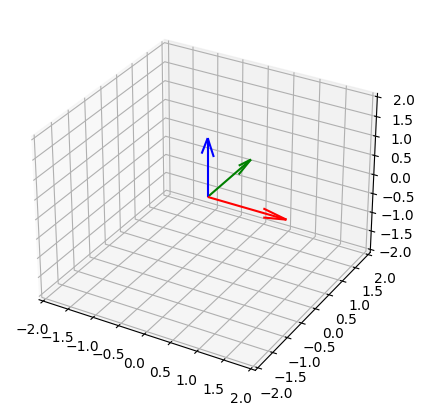

In [ ]:
#title Preparando o objeto Figure e plotando com o quiver
fig_quivers = plt.figure(figsize=(5,5))
ax0 = plt.axes(projection='3d')
ax0.set_xlim([-2,2])
ax0.set_ylim([-2,2])
ax0.set_zlim([-2,2])

# Ao escolher pivot='tail', fazemos que seja calda - ponta.

ax0.quiver(point[0],point[1],point[2], # coordenada da cauda
            e1[0],e1[1],e1[2], # coordenada da ponta
           color='red',pivot='tail',  length=1.5)
ax0.quiver(point[0],point[1],point[2],e2[0],e2[1],e2[2],color='green',pivot='tail',  length=1.5)
ax0.quiver(point[0],point[1],point[2],e3[0],e3[1],e3[2],color='blue',pivot='tail',  length=1.5)
plt.show()

Repeated Origin:
 [[0 0 0]
 [0 0 0]
 [0 0 0]] (3, 3)
Reference Frame:
 [[1 0 0]
 [0 1 0]
 [0 0 1]] (3, 3)


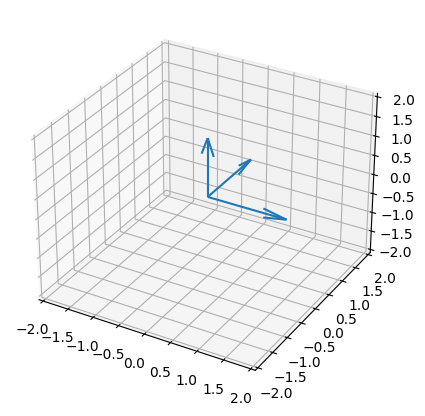

In [ ]:
# Another way to plot the axes, but all with the same color

# Stacking the origin and the axis in matrices
points = np.hstack((point,point,point))
base = np.hstack((e1,e2,e3))

print('Repeated Origin:\n',points,points.shape)
print('Reference Frame:\n',base,base.shape)

fig_quivers = plt.figure(figsize=(5,5))
ax1 = plt.axes(projection='3d')
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.set_zlim([-2,2])

ax1.quiver(points[0,:],points[1,:],point[2,:],base[0,:],base[1,:],base[2,:],length=1.5)
plt.show()

In [64]:
# @title criando a função para mostrar os vetores
def show_arrow(matrix):
    fig_quivers = plt.figure(figsize=(5,5))
    ax1 = plt.axes(projection='3d')
    ax1.set_xlim([-2,2])
    ax1.set_ylim([-2,2])
    ax1.set_zlim([-2,2])

    ax1.quiver(points[0,:],points[1,:],points[2,:],matrix[0,:],matrix[1,:],matrix[2,:],length=1.5)
    plt.show()

In [50]:
def rotate_matrix(angle,matrix,axes='z'):
    c_ang = np.cos(angle)
    s_ang = np.sin(angle)

    # Pelamordedeus, deixe seus vetores bonitinhos.

    if axes == 'z':
        # Essa é a rotação em referência ao eixo Z
        R = np.matrix(
            [[c_ang , -s_ang,   0],             # index 0 - Linha 1
            [s_ang , c_ang,    0],             # index 1 - Linha 2
            [0     , 0,        1]]             # index 2 - Linha 3
        )
    if axes == 'x':
        # Essa é a rotação em referência ao eixo x
        R = np.matrix(
            [[1, 0, 0],
            [0, c_ang, -s_ang],
            [0, s_ang, c_ang]]
        )
    if axes == 'y':
        # Essa é a rotação em referência ao eixo y
        R = np.matrix(
            [[c_ang,    0, -s_ang],
            [0,         1,  0],
            [s_ang,     0,  c_ang]]
        )
    return R*matrix

In [112]:
# @title Rodando automaticamente { run: "auto" }
angle = 120 # @param {type:"slider", min:0, max:360, step:1}
axes = 'z' # @param ["x", "y", "z"]
show_arrow(rotate_matrix(angle,base,axes='y'))

ValueError: ignored

# Coordenadas Homogêneas

Lembrando:
*   (wx,wy,wz,w) represent the same point for different w
*   (0,0,0,0) does not exist
*   if the last coordinate is 0 (zero) → point at infinity or ideal point (direction)

In [110]:
#@title Definindo as variáveis para criar o referencial do mundo


#base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

# ponto de origem
point = np.array([[0],[0],[0],[1]])

# ponto qualquer
p = np.array([[5],[3],[-1],[1]])

# base da câmera (na origem do mundo)
cam_base  = np.hstack([base,point])

In [106]:
def translation_matrix(dx,dy,dz):
    T = np.eye(4)
    T[0,-1] = dx
    T[1,-1] = dy
    T[2,-1] = dz
    return T

def translating(translation_matrix,point):
    if DEBUG:
        print('T:\n', translation_matrix)
        print('point:\n',point)
    return np.dot(translation_matrix,point)

In [83]:
def draw_arrows(point,base,axis,length=1.5):
    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)
    plt.show()
    return axis

In [111]:
t_1 = translation_matrix(2,3,4)
new_p = translating(t_1,p)
draw_arrows(new_p,base,)


T:
 [[1. 0. 0. 2.]
 [0. 1. 0. 3.]
 [0. 0. 1. 4.]
 [0. 0. 0. 1.]]
point:
 [[ 5]
 [ 3]
 [-1]
 [ 1]]
[[7.]
 [6.]
 [3.]
 [1.]]
